# Save data to GRIB

Here is an example of generating custom GRIB using climetlab. 

To generate a GRIB, CliMetLab providesthe function `cml.new_grib_output()`, requiring the following arguments:

- A numpy array containing the data to save.
- An object containing a template for the GRIB metadata, such as a CliMetLab source  
- (Optional) A dictionary of metadata to override the template metadata. 

Using this function is similar to `open(path)` in python, as shown below:

### A template for the GRIB metadata


In [1]:
import climetlab as cml

s = cml.load_source(
    "cds",
    "reanalysis-era5-single-levels",
    variable=["2t", "msl"],
    product_type="reanalysis",
    area=[50, -50, 20, 50],
    date="2012-12-12",
    time="12",
)

template = s[0] # temperature template

### An numpy array with the data:

In [2]:
import numpy as np
import math

def generate_numpy_field(shape, ref=273.15, offset1=0, offset2=0):
    f = np.zeros(shape=shape, dtype=np.float64)
    for i in range(f.shape[0]):
        for j in range(f.shape[1]):
            f[i, j] = ref + (math.sin((i + offset1) / 45.0) + math.sin((j + offset2) / 90.0)) * 15
    return f

arr = generate_numpy_field(template.shape)

Let us plot the generated field for inspection. Notice how `cml.plot_map()` also uses the template to find the metadata required to plot the field as a temperature field.

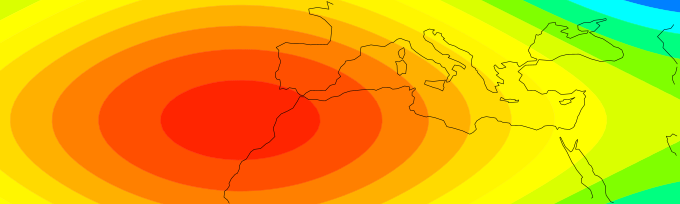

In [3]:
cml.plot_map(arr, metadata=template)


### Write to GRIB

#### Method 1
Compare to the usual python code:

``` python
f = open(path)
f.write(data)
f.close()
```


In [4]:
output = cml.new_grib_output("test1.grib", template=template)
output.write(arr)
output.close()


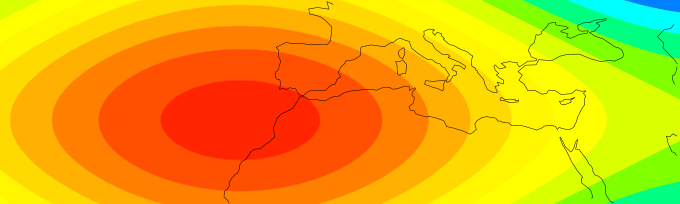

In [5]:
cml.plot_map(cml.load_source("file", "test1.grib"))


### Write to GRIB

#### Method 2

The template can also be added in the `.write()` method instead of the `cml.new_grib_output()` function:


In [6]:
output = cml.new_grib_output("test2.grib")
output.write(arr, template=template)
output.close()


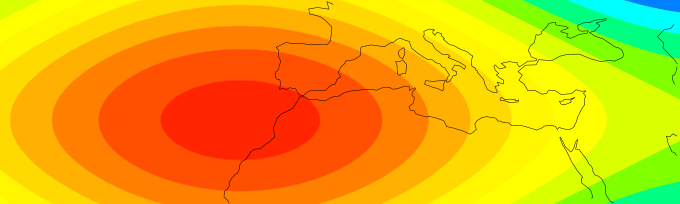

In [7]:
cml.plot_map(cml.load_source("file", "test2.grib"))


#### Method 3
Compare to the usual python code:

``` python
with open(path) as f:
	f.write(data)
```


In [8]:
with cml.new_grib_output("test3.grib", template=template) as output:
    output.write(arr)


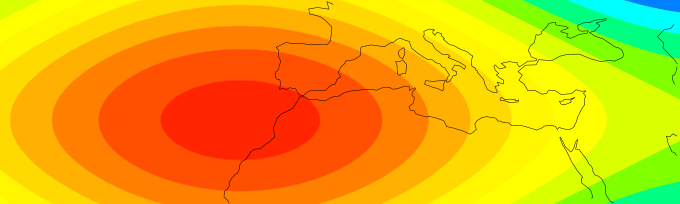

In [9]:
cml.plot_map(cml.load_source("file", "test3.grib"))


Once a GRIB output has been open, several fields can be written to it, as follows:

In [10]:
with cml.new_grib_output("test4.grib", template=template) as output:
    for i in range(24):
        f = generate_numpy_field(template.shape, offset1=i, offset2=i)
        output.write(f, metadata={"time": i})


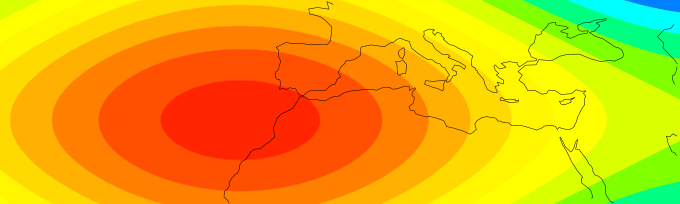

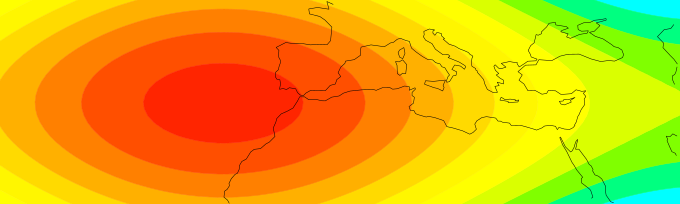

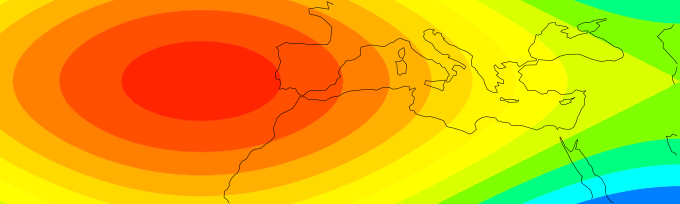

In [11]:
test4 = cml.load_source("file", "test4.grib")

assert len(test4) == 24

cml.plot_map(test4[0])
cml.plot_map(test4[10])
cml.plot_map(test4[-1])
